<a target="_blank" href="https://colab.research.google.com/github/socrates77/snn-tre/blob/main/notebooks/Leaky-Integrate.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Preso in considerazione il modello Leaky Integrate con la seguente equazione differenziale

$$
\begin{equation*}
    {\tau}{\frac{{\mathrm{d}}V_{mem}(t)}{{\mathrm{d}}t}}=-V_{mem}(t)+RI_{syn}(t)
\end{equation*}
$$

Prendendo ad esempio valori tipici per i parametri $R$ e $C$ 
- $R=50M{\Omega}$
- $C=100pF$ 

otteniamo $\tau=5ms$.

Lo implementiamo in python con il metodo di Eulero

Dati $I_{syn}(t)=0$ e $V_{mem}(0)=1V$ possiamo mostrare il comportamento Leaky del modello
Leaky Integrate and Fire

In [46]:
import numpy as np
import matplotlib.pyplot as plt 

def li_neuron(v, time_step=1e-3, I=0, R=5e7, C=1e-10):
  '''
  Leaky Integrate neuron modelled like an RC Circuit
  '''
  tau=R*C
  v = v + (time_step/tau)*(-v + I*R)
  return v

def v_mem_plot(time_vector, v_mem, I=[], filename='figure.eps', format='eps', title=''):
  # Creare la figura
  fig, ax = plt.subplots() # crea la figura e gli assi
  if len(I) == len(time_vector) :
    ax1 = ax.twinx()
    ax1.set_ylabel('Corrente (nA)')
    ax1.plot(time_vector, I, color='r')
  ax.plot(time_vector, v_mem) # disegna il grafico della tensione ai capi del condensatore
  ax.set_xlabel('Tempo (ms)') # aggiungi l'etichetta all'asse x
  ax.set_ylabel('Tensione (V)') # aggiungi l'etichetta all'asse y
  ax.set_title(title) # aggiungi il titolo alla figura

  # Salvare la figura in formato EPS
  fig.savefig(filename, format=format)

  # mostra
  plt.show()

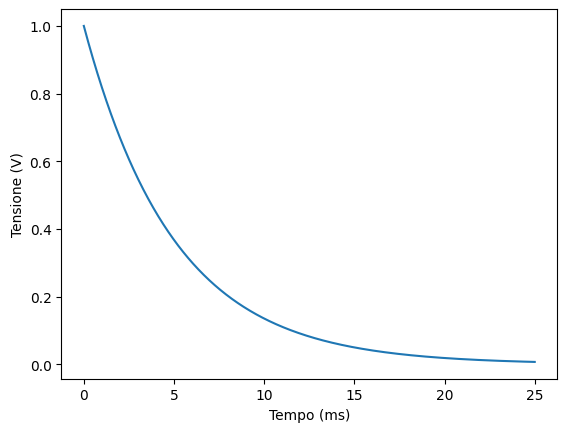

In [47]:
time_step=1e-3*25e-3 # Delta t del metodo di Eulero
time_vector = np.linspace(0, 25 + time_step, 1000)

v_init = 1
prev = v_init
v_mem = np.zeros_like(time_vector)

for i in range(0, len(time_vector)):
  v_mem[i] = prev
  prev = li_neuron(prev, time_step)

v_mem_plot(time_vector, v_mem, 'potenziale-di-membrana-comportamento-leaky.eps')



Dati $I_{syn}(t)\ne0$ e $V_{mem}(0)=0V$ possiamo mostrare il comportamento Integrate del modello
Leaky Integrate and Fire.

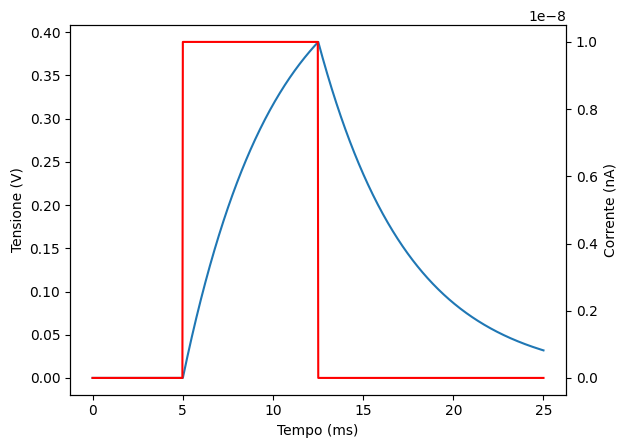

In [48]:
time_step=1e-3*25e-3 # Delta t del metodo di Eulero
time_vector = np.linspace(0, 25 + time_step, 1000)
I_syn = np.zeros_like(time_vector)
for i in range(200, 500):
  I_syn[i] = 10e-9 # 10nA
v_init = 0
I=0
prev = v_init
v_mem = np.zeros_like(time_vector)

for i in range(0, len(time_vector)):
  I = I_syn[i]
  v_mem[i] = prev
  prev = li_neuron(prev, time_step, I)

v_mem_plot(time_vector, v_mem, I=I_syn, filename='potenziale-di-membrana-comportamento-integrate.eps')
